<a href="https://colab.research.google.com/github/ernanhughes/boosting-examples/blob/main/Discovering_Exoplanets_XGBoost_Imbalanced_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Exoplanet Data, n Rows

In [3]:
import pandas as pd
url = 'https://media.githubusercontent.com/media/PacktPublishing/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/master/Chapter04/exoplanets.csv'
df = pd.read_csv(url, nrows=500)

y = df['LABEL']
X = df.iloc[:, 1:]

print(df.shape)
df.head()

(500, 3198)


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


# Create Light Plot

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

def light_plot(index):
    y_vals = X.iloc[index]
    x_vals = np.arange(len(y_vals))
    plt.figure(figsize=(15,8))
    plt.xlabel('Number of Observations')
    plt.ylabel('Light Flux')
    plt.title('Light Plot ' + str(index), size=15)
    plt.plot(x_vals, y_vals)
    plt.show()

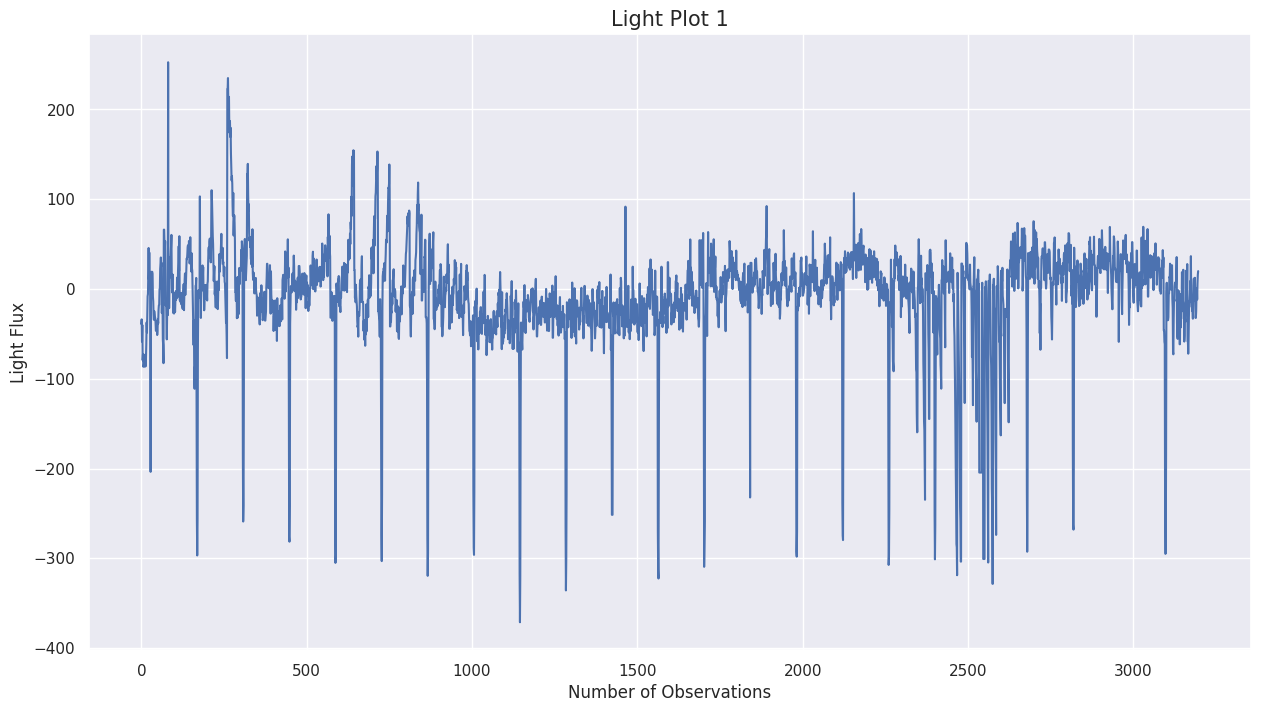

In [5]:
light_plot(1)

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [7]:
# split data - stratify y to ensure same percentage of exoplanets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [8]:
y_train.value_counts()

LABEL
1    347
2     28
Name: count, dtype: int64

In [9]:
y_test.value_counts()

LABEL
1    116
2      9
Name: count, dtype: int64

In [10]:
# Build XGBoost model - with accuracy score
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [1 2]

In [ ]:
9/250

0.036

In [ ]:
(250-9)/250

0.964

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[54,  0],
       [ 8,  1]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        54
           2       1.00      0.11      0.20         9

    accuracy                           0.87        63
   macro avg       0.94      0.56      0.57        63
weighted avg       0.89      0.87      0.83        63



In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, pos_label=2)

0.1111111111111111

In [ ]:
# Change 1 to 0, 2 to 1 in target column
df['LABEL'] = df['LABEL'].replace(1, 0)
df['LABEL'] = df['LABEL'].replace(2, 1)

# Reassign y to new df['LABEL']
y = df['LABEL']

In [ ]:
y.value_counts()

0    213
1     37
Name: LABEL, dtype: int64

In [ ]:
# split data - stratify y to ensure same percentage of exoplanets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
y.value_counts()

0    213
1     37
Name: LABEL, dtype: int64

In [ ]:
# weight y values so they have equal weights
# 37 * 213/37 = 213 is the goal
weight = y[y==0].count()/y[y==1].count()
weight

5.756756756756757

In [ ]:
# Build XGBoost model - with defaul accuracy score
model = XGBClassifier(scale_pos_weight=weight, random_state=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.4444444444444444
[[49  5]
 [ 5  4]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.44      0.44      0.44         9

    accuracy                           0.84        63
   macro avg       0.68      0.68      0.68        63
weighted avg       0.84      0.84      0.84        63



In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=2)

def grid_search(params, model=XGBClassifier(scale_pos_weight=weight,
                                            random_state=2)):
  grid = GridSearchCV(model, params, cv=kfold, scoring='recall')
  grid.fit(X, y)
  print('Best params:', grid.best_params_)
  print('Best score:', grid.best_score_)

In [ ]:
cross_val_score(XGBClassifier(scale_pos_weight=weight, random_state=2),
                X, y, cv=kfold, scoring='recall')

array([0.05263158, 0.5       ])

In [ ]:
grid_search({'max_depth':[2, 4, 6, 8, 10]})

Best params: {'max_depth': 4}
Best score: 0.32894736842105265


In [ ]:
grid_search({'max_depth':[1, 2, 3, 4, 5],
             'n_estimators':[50, 200]})

Best params: {'max_depth': 2, 'n_estimators': 50}
Best score: 0.35672514619883045


In [ ]:
grid_search({'max_depth':[1, 2, 4],
             'n_estimators':[40, 60, 75]})

Best params: {'max_depth': 2, 'n_estimators': 40}
Best score: 0.38450292397660824


In [ ]:
grid_search({'max_depth':[2],
             'n_estimators':[40],
             'colsample_bytree':[0.2, 0.35, 0.5, 0.65, 0.8]})

Best params: {'colsample_bytree': 0.8, 'max_depth': 2, 'n_estimators': 40}
Best score: 0.35526315789473684


In [ ]:
grid_search({'max_depth':[2],
             'n_estimators':[40],
             'colsample_bynode':[0.2, 0.35, 0.5, 0.65, 0.8]})

Best params: {'colsample_bynode': 0.65, 'max_depth': 2, 'n_estimators': 40}
Best score: 0.35672514619883045


In [ ]:
grid_search({'max_depth':[2],
             'n_estimators':[40],
             'colsample_bylevel':[0.2, 0.35, 0.5, 0.65, 0.8]})

Best params: {'colsample_bylevel': 0.65, 'max_depth': 2, 'n_estimators': 40}
Best score: 0.35672514619883045


In [ ]:
grid_search({'max_depth':[2],
             'n_estimators':[40],
             'colsample_bylevel':[0.6, 0.8],
             'colsample_bynode':[0.6, 0.8],
             'colsample_bytree':[0.6, 0.8]})

Best params: {'colsample_bylevel': 0.6, 'colsample_bynode': 0.8, 'colsample_bytree': 0.8, 'max_depth': 2, 'n_estimators': 40}
Best score: 0.32894736842105265


In [ ]:
grid_search({'max_depth':[2],
             'n_estimators':[40],
             'colsample_bylevel':[0.75, 1],
             'colsample_bynode':[0.75, 1],
             'colsample_bytree':[0.75, 1]})

Best params: {'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'max_depth': 2, 'n_estimators': 40}
Best score: 0.38450292397660824


In [ ]:
grid_search({'max_depth':[2],
             'n_estimators':[40],
             'colsample_bylevel':[1],
             'colsample_bynode':[1],
             'colsample_bytree':[1],
             'learning_rate':[0.001, 0.01, 0.1]})

Best params: {'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 40}
Best score: 0.5467836257309941


In [ ]:
grid_search({'max_depth':[2],
             'n_estimators':[40],
             'colsample_bylevel':[0.85,],
             'colsample_bynode':[0.85],
             'colsample_bytree':[0.85],
             'learning_rate':[0.001]})

Best params: {'colsample_bylevel': 0.85, 'colsample_bynode': 0.85, 'colsample_bytree': 0.85, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 40}
Best score: 0.5467836257309941


In [ ]:
# Build XGBoost model - with accuracy score
model = XGBClassifier(scale_pos_weight=weight,
                      max_depth=2,
                      n_estimators=40,
                      colsample_bylevel=1,
                      colsample_bynode=1,
                      colsample_bytree=1,
                      learning_rate=0.001,
                      random_state=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6666666666666666
[[30 24]
 [ 3  6]]
              precision    recall  f1-score   support

           0       0.91      0.56      0.69        54
           1       0.20      0.67      0.31         9

    accuracy                           0.57        63
   macro avg       0.55      0.61      0.50        63
weighted avg       0.81      0.57      0.64        63

